<a href="https://colab.research.google.com/github/MahdiFaourr/MahdiFaourr/blob/main/skin_cancer_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install opendatasets library for downloading the dataset needed
!pip install opendatasets

In [ ]:
# Import necessary libraries and functions
import opendatasets as od
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.metrics import Precision
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Dense,Dropout,MaxPooling2D,Flatten
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow
import cv2

In [ ]:
# Download the data from kaggle in the working directory
od.download("https://www.kaggle.com/datasets/hasnainjaved/melanoma-skin-cancer-dataset-of-10000-images")

In [ ]:
# Set up ImageDataGenerator with augmentation and preprocessing options
datagen = ImageDataGenerator(
    rescale=1./255,            # Rescale pixel values to be between 0 and 1
    shear_range=0.2,            # Shear intensity (shear mapping)
    zoom_range=0.2,             # Random zoom in the range [1-zoom_range, 1+zoom_range]
    rotation_range=20,          # Random rotation in the range [-rotation_range, rotation_range] degrees
    width_shift_range=0.2,      # Random horizontal shift
    height_shift_range=0.2,     # Random vertical shift
    horizontal_flip=True,       # Randomly flip inputs horizontally
    vertical_flip=True,         # Randomly flip inputs vertically
    fill_mode='nearest'         # Strategy for filling in newly created pixels
)

# Apply the ImageDataGenerator to your dataset using flow_from_directory or flow_from_dataframe
train_generator = datagen.flow_from_directory(
    '/content/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/train',
    batch_size=32,
    class_mode='binary'
)

valid_generator = datagen.flow_from_directory(
    '/content/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test',
    batch_size=32,
    class_mode='binary'
)


In [ ]:
# Create a model
model=Sequential()
# Adding layers
model.add(Conv2D(32,(2,2),input_shape=(256,256,3),activation="relu"))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(2,2),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer="adam",loss="binary_crossentropy",metrics=['acc',Precision()])# Compile the model

In [ ]:
# Print the summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 255, 255, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 253, 253, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 126, 126, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 125, 125, 64)      8256      
                                                                 
 conv2d_3 (Conv2D)           (None, 123, 123, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 61, 61, 64)        0         
 g2D)                                                   

In [ ]:
# Train the model
model.fit(train_generator,validation_data=valid_generator,batch_size=len(train_generator),verbose=1,epochs=4)

In [ ]:
# Evaluate on Valid_generator
model.evaluate(valid_generator)

32/32 [==============================] - 99s 3s/step - loss: 0.2757 - accuracy: 0.8870 - precision_1: 0.9348


[0.2756732106208801, 0.8870000243186951, 0.934831440448761]

In [ ]:
def skin_cancer_class_detector(img_path):
    # Load and preprocess the image
    img = image.load_img(img_path, target_size=(256,256,3))  # Adjust target_size as needed
    img_array = img_to_array(img)
    img_array = np.expand_dims(img_array, 0)  # Add batch dimension
    img_array /= 255.0  # Normalize pixel values

    # Make predictions
    predictions = model.predict(img_array)

    # The model has two classes ( benign and malignant)
    class_labels = ['Benign', 'Malignant']
    if predictions[0,0]>0.5:
      print(f"The predicted class for the given image is: {class_labels[0]}")
    else:
      print(f"The predicted class for the given image is: {class_labels[1]}")

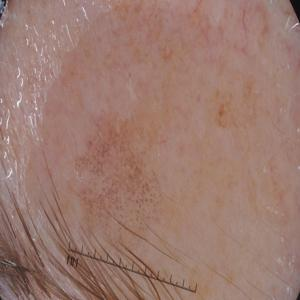

In [14]:
# Read the image
image_path_1 = "/content/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/benign/melanoma_10007.jpg"
image = cv2.imread(image_path_1)

# Display the image
cv2_imshow(image)


In [ ]:
# Example usage 1:
skin_cancer_class_detector(image_path_1)

1/1 [==============================] - 1s 1s/step
The predicted class for the given image is: Benign


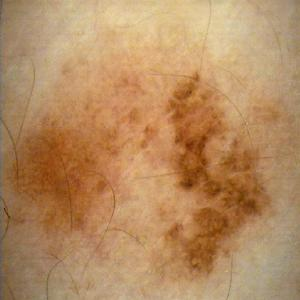

In [15]:
# Read the image
image_path_2 = "/content/melanoma-skin-cancer-dataset-of-10000-images/melanoma_cancer_dataset/test/malignant/melanoma_10120.jpg"
image = cv2.imread(image_path_2)

# Display the image
cv2_imshow(image)


In [ ]:
# Example usage 2:
predicted_class = skin_cancer_class_detector(image_path_2)

1/1 [==============================] - 0s 90ms/step
The predicted class for the given image is: Malignant


In [ ]:
# Save the model
model.save("skin_cancer_model.h5")